In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [8]:
def load_features():
    interictal_features_train = np.load('./interictal_train.npy')
    preictal_features_train = np.load('./preictal_train.npy')
    X_train = np.concatenate((interictal_features_train, preictal_features_train), axis=0)
    
    interictal_targets_train = -1*np.ones(interictal_features_train.shape[0])
    preictal_targets_train = np.ones(preictal_features_train.shape[0])
    y_train = np.concatenate((interictal_targets_train, preictal_targets_train), axis=0)
    
    interictal_features_test = np.load('./interictal_test.npy')
    preictal_features_test = np.load('./preictal_test.npy')
    X_test = np.concatenate((interictal_features_test, preictal_features_test), axis=0)
    
    interictal_targets_test = -1*np.ones(interictal_features_test.shape[0])
    preictal_targets_test = np.ones(preictal_features_test.shape[0])
    y_test = np.concatenate((interictal_targets_test, preictal_targets_test), axis=0)
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = load_features()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2754, 23, 2) (2754,)
(46818, 23, 2) (46818,)


In [11]:
# select channel 1
X_train_ch = X_train[: , 0, :]
X_test_ch = X_test[:, 0, :]
print(X_train_ch.shape, y_train.shape)
print(X_test_ch.shape, y_test.shape)

(2754, 2) (2754,)
(46818, 2) (46818,)


In [12]:
%%time
model = LogisticRegression(random_state=0)
model.fit(X_train_ch, y_train)

CPU times: user 26.6 ms, sys: 4.37 ms, total: 31 ms
Wall time: 39.7 ms


LogisticRegression(random_state=0)

In [14]:
lr_probs = model.predict_proba(X_test_ch)
lr_probs = lr_probs[:, 1] # keep probabilities for the positive outcome only

In [19]:
lr_probs

array([0.02376044, 0.02376044, 0.02376044, ..., 0.96566514, 0.92527196,
       0.96550628])

In [22]:
y_train

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [17]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(X_test_ch))]

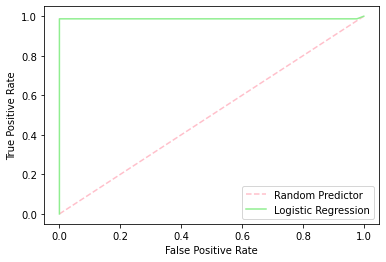

In [28]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure()
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='pink', label='Random Predictor')
plt.plot(lr_fpr, lr_tpr, color='lightgreen', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('../figures/classification/logit_regr_ROC_ch1.pdf')
plt.show()

In [27]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Predictor: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

Random Predictor: ROC AUC=0.500
Logistic Regression: ROC AUC=0.987
